In [1]:
import random
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import math
from IPython.display import display
from ipywidgets import interact
from NearestAndAnnealing.anneal import SimAnneal
%matplotlib inline

In [2]:
coords = [[round(random.uniform(-1000,1000),4),round(random.uniform(-1000,1000),4)] for i in range(100)]

IntText(value=10, description='Начальная температура:')

FloatText(value=0.995, description='Альфа:')

FloatText(value=1e-08, description='Конечная температура:')

IntText(value=10000, description='Макс. итераций:')

Checkbox(value=False, description='Случайная инициализация')

Button(description='Старт', style=ButtonStyle())

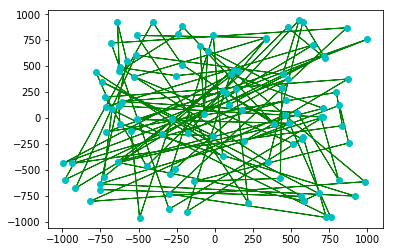

Best fitness obtained:  26018.772
Improvement:  0.25


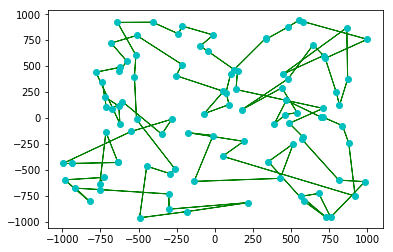

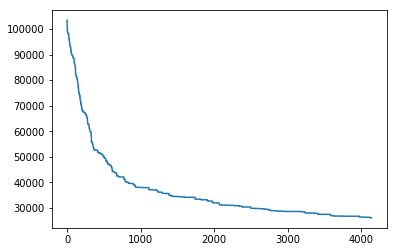

interactive(children=(IntSlider(value=1, description='step', max=41, min=1), Output()), _dom_classes=('widget-…

In [ ]:
start_temp = widgets.IntText(
    value=math.sqrt(len(coords)),
    description='Начальная температура:',
    disabled=False
)
alpha = widgets.FloatText(
    value=0.995,
    description='Альфа:',
    disabled=False
)
end_temp = widgets.FloatText(
    value=0.00000001,
    description='Конечная температура:',
    disabled=False
)
max_iter = widgets.IntText(
    value=10000,
    description='Макс. итераций:',
    disabled=False
)
rand_init = widgets.Checkbox(
    value=False,
    description='Случайная инициализация',
    disabled=False
)
start = widgets.Button(
    description='Старт'
)

def on_button_clicked(b):
    sa = SimAnneal(coords, T=start_temp.value, alpha=alpha.value, stopping_T=end_temp.value,
                   stopping_iter=max_iter.value, rand_init=rand_init.value)
    sa.visualize_routes()
    sa.anneal()
    sa.visualize_routes()
    sa.plot_learning()
    interact(sa.build_plot, step=widgets.IntSlider(min=1, max=len(sa.history), step=1, value=1))

display(start_temp)
start.on_click(on_button_clicked)
display(alpha)
display(end_temp)
display(max_iter)
display(rand_init)
display(start)
